### Pós-graduação em Ciência de Dados e Machine Learning

#### Módulo 3 - Data Mining e Machine Learning

#### Disciplina: **Big Data com MapReduce - Spark **

#### Turma: **A**

#### Projeto Final para disciplina Big Data com MapReduce - Spark 

<BR>

#### Nome do Integrante: Matheus Rodrigues Fernandes Arcelino    RA:    


# Explicação do projeto final da disciplina


A respostas são individuais ou por dupla.

Escolha 10 questões desta avaliação final da disciplina.

Considere que algumas questões possuem pontuação equivalente a duas questões: questão 5, questão 6 e questão 7. Portanto se você escolhe as questões de 1 a 7 terá a pontuação de 10 questões.

# Projeto Machine Learning com SPARK

### Questão 1) Descrição do Problema
*News of the Brazilian Newspaper*  é um dataset obtido em:https://www.kaggle.com/marlesson/news-of-the-site-folhauol.


A presente base de dados, contém 167.053 informações a respeito de artigos publicados na  Folha de S. Paulo - http://www.folha.uol.com.br. Os dados foram coletados entres os intervalos de Janeiro de 2015 a setembro de 2017. 

Processamento de Linguagem Natural (PNL) é uma campo de estudo da ciência da computação que visa treinar o computador para perceber e gerar a linguagem humana diretamente, por meio de algortimos de aprendizado de maquina.

O processamento de linguagem natural nas notícias abre as portas para a indústria de mídia. Estes lidam com a linguagem humana durante todos o tempo e a capacidade do computador de trabalhar com a linguagem humana o torna capaz de mudar completamente os processos de mídia em todo o mundo.

**Pergunta de pesquisa:** Como podemos utilizar técnicas de processamento de liguagem natural (PNL) para analisar textos e titulos de arigos de jornais?

### Questão 2) Algoritmo

Qual o motivo da escolha do algoritmo para resolver este problema ?


Para a resolução do problema foi aplicado a técnica de aprendizado de máquina não supervisionado.

A abordagem escolhida foi de clustering.

Algoritmos escolhidos formam:

 - KMeans
 - Bisecting k-means
 

K-Means é um dos algoritmos de clustering mais comumente usados que agrupa os pontos de dados em um número predefinido de clusters. 

Bisecting k-means é um tipo de agrupamento hierárquico que usa uma abordagem divisiva, todas as observações começam em um agrupamento e as divisões são realizadas recursivamente conforme se desce na hierarquia.A divisão das Bisecting k-means pode frequentemente ser muito mais rápida do que as KMeans regulares, mas geralmente produzirá um agrupamento diferente.
 
 
No que diz respeito a escolha dos algoritmos, a presente pesquisa tem como objetivo verificar o nível de eficiência e performance dos mesmos.

### Importação dos Pacotes

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer,HashingTF, StringIndexer, RegexTokenizer, StopWordsRemover, CountVectorizer, IDF, Normalizer
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import col, udf, regexp_replace, isnull,trim
import nltk
import warnings as warn
import numpy as np
import matplotlib.pyplot as plt
nltk.download("stopwords")
warn.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Questão 3) Dataset

Leia o dataset

Caso seja de um arquivo envie o dataset junto com este notebook. 

In [2]:
spark = SparkSession.builder.appName("clustering_documents").getOrCreate()

In [3]:
#### Resposta
brazilian_newspaper = spark.read.csv("data/News_of_the_Brazilian_Newspaper/articles.csv",
                                      inferSchema=True, header=True)

In [4]:
print("Número de linhas: ", str(brazilian_newspaper.count()))
print("Número de colunas: ", str(len(brazilian_newspaper.columns)))

Número de linhas:  174885
Número de colunas:  6


In [5]:
brazilian_newspaper.printSchema()

root
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- link: string (nullable = true)



In [6]:
brazilian_newspaper.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               title|                text|                date|            category|         subcategory|                link|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Lula diz que está...|"Com a possibilid...| exigiu um pedido...| mesmo fora da di...| será um cabo ele...| réu em sete açõe...|
|'Decidi ser escra...|"Para Oumou Sanga...| disse durante um...|   no Rio de Janeiro| neste domingo (8...| ela conta que co...|
|Três reportagens ...|"Três reportagens...| devastação e mor...| do jornal ""O Es...| o Prêmio Petrobr...| além de dois prê...|
|Filme 'Star Wars:...|"A Disney divulgo...| oitavo episódio ...| episódio mais re...| a personagem Rey...| e cenas do trail...|
|CBSS inicia acord...|"O CBSS, banco da...| quase sempre por...| que de fato conc...| disse à Reuters ..

In [7]:
brazilian_newspaper.head()

Row(title="Lula diz que está 'lascado', mas que ainda tem força como cabo eleitoral", text='"Com a possibilidade de uma condenação impedir sua candidatura em 2018, o ex-presidente Luiz Inácio Lula da Silva fez, nesta segunda (9), um discurso inflamado contra a Lava Jato, no qual disse saber que está ""lascado""', date=' exigiu um pedido de desculpas do juiz Sergio Moro e afirmou que', category=' mesmo fora da disputa pelo Planalto', subcategory=' será um cabo eleitoral expressivo para a sucessão de Michel Temer.  Segundo o petista', link=' réu em sete ações penais')

In [8]:
brazilian_newspaper.columns

['title', 'text', 'date', 'category', 'subcategory', 'link']

### Questão 4) Tratamento dos dados

In [9]:
# Selecionando somente os features necessarias para analise 
base_textos  = brazilian_newspaper.select('title','text')

In [10]:
base_textos.show()

+--------------------+--------------------+
|               title|                text|
+--------------------+--------------------+
|Lula diz que está...|"Com a possibilid...|
|'Decidi ser escra...|"Para Oumou Sanga...|
|Três reportagens ...|"Três reportagens...|
|Filme 'Star Wars:...|"A Disney divulgo...|
|CBSS inicia acord...|"O CBSS, banco da...|
|Em encontro, Bono...|"O vocalista da b...|
|Posso sair do Bra...|"O italiano Cesar...|
|Tite diz querer s...|"Pela primeira ve...|
|Supremo nega pedi...|"O STF (Supremo T...|
|Em teste, WhatsAp...|"O aplicativo de ...|
|Dodge defende man...|"A procuradora-ge...|
|Incêndios deixam ...|"O governo da Cal...|
|BNDES descarta ir...|"O presidente do ...|
|Apple cita fornec...|"O presidente-exe...|
|Volkswagen terá c...|"A Volkswagen pro...|
|Polícia do Rio pr...|"A polícia do Rio...|
|Juiz decreta pris...|"O juiz Marcelo B...|
|Após 50 anos, exe...|"Cansada depois d...|
|Bolsa recua pelo ...|"A Bolsa brasilei...|
|Parlamentarismo p...|"""Estou c

In [11]:
# Verificando a quantidade observações nulas ou vazias
def null_value_count(df):
    lista_colunas_null = []
    num_linhas = df.count()
    for k in df.columns:
        null_linha = df.where(col(k).isNull()).count()
        if(null_linha > 0):
            temp = k,null_linha
            lista_colunas_null.append(temp)
    return(lista_colunas_null)
lista_coluna_null = null_value_count(base_textos)
spark.createDataFrame(lista_coluna_null, ['Features','Count']).show()

+--------+-----+
|Features|Count|
+--------+-----+
|    text| 7252|
+--------+-----+



In [12]:
base_textos = base_textos.dropna()
print("Número de linhas: ", str(base_textos.count()))
print("Número de colunas: ", str(len(base_textos.columns)))
print("=============================================")
base_textos.show()

Número de linhas:  167633
Número de colunas:  2
+--------------------+--------------------+
|               title|                text|
+--------------------+--------------------+
|Lula diz que está...|"Com a possibilid...|
|'Decidi ser escra...|"Para Oumou Sanga...|
|Três reportagens ...|"Três reportagens...|
|Filme 'Star Wars:...|"A Disney divulgo...|
|CBSS inicia acord...|"O CBSS, banco da...|
|Em encontro, Bono...|"O vocalista da b...|
|Posso sair do Bra...|"O italiano Cesar...|
|Tite diz querer s...|"Pela primeira ve...|
|Supremo nega pedi...|"O STF (Supremo T...|
|Em teste, WhatsAp...|"O aplicativo de ...|
|Dodge defende man...|"A procuradora-ge...|
|Incêndios deixam ...|"O governo da Cal...|
|BNDES descarta ir...|"O presidente do ...|
|Apple cita fornec...|"O presidente-exe...|
|Volkswagen terá c...|"A Volkswagen pro...|
|Polícia do Rio pr...|"A polícia do Rio...|
|Juiz decreta pris...|"O juiz Marcelo B...|
|Após 50 anos, exe...|"Cansada depois d...|
|Bolsa recua pelo ...|"A Bol

In [13]:
# Removendo todos os caracteres digitos 
base_textos = base_textos.withColumn("text",regexp_replace(col('text'), '\d+', ' '))
base_textos = base_textos.withColumn("text", trim(col("text")))
base_textos = base_textos.withColumn("title",regexp_replace(col('title'), '\d+', ' '))
base_textos = base_textos.withColumn("title", trim(col("title")))
base_textos.show()

+--------------------+--------------------+
|               title|                text|
+--------------------+--------------------+
|Lula diz que está...|"Com a possibilid...|
|'Decidi ser escra...|"Para Oumou Sanga...|
|Três reportagens ...|"Três reportagens...|
|Filme 'Star Wars:...|"A Disney divulgo...|
|CBSS inicia acord...|"O CBSS, banco da...|
|Em encontro, Bono...|"O vocalista da b...|
|Posso sair do Bra...|"O italiano Cesar...|
|Tite diz querer s...|"Pela primeira ve...|
|Supremo nega pedi...|"O STF (Supremo T...|
|Em teste, WhatsAp...|"O aplicativo de ...|
|Dodge defende man...|"A procuradora-ge...|
|Incêndios deixam ...|"O governo da Cal...|
|BNDES descarta ir...|"O presidente do ...|
|Apple cita fornec...|"O presidente-exe...|
|Volkswagen terá c...|"A Volkswagen pro...|
|Polícia do Rio pr...|"A polícia do Rio...|
|Juiz decreta pris...|"O juiz Marcelo B...|
|Após   anos, exec...|"Cansada depois d...|
|Bolsa recua pelo ...|"A Bolsa brasilei...|
|Parlamentarismo p...|"""Estou c

In [22]:
textos = base_textos.select('text')
titles = base_textos.select('title')

In [14]:
# Pre processamento da base
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
stop_words_remover = StopWordsRemover(inputCol='tokens',
                                      outputCol='stop_word_removed',
                                      stopWords=nltk.corpus.stopwords.words('portuguese'))
count_vectorizer = CountVectorizer(inputCol='stop_word_removed', outputCol='raw_features', vocabSize = 1000)
idf = IDF(minDocFreq=3, inputCol="raw_features", outputCol="idf_features")
standard_scaler = StandardScaler(inputCol='idf_features',outputCol='features', withStd=True, withMean=False)

In [21]:
pipeline_texto = Pipeline(stages=[tokenizer, stop_words_remover, count_vectorizer, idf, standard_scaler])

In [25]:
modelo_texto = pipeline_texto.fit(textos)
text_feature = modelo_texto.transform(textos)
text_feature.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|              tokens|   stop_word_removed|        raw_features|        idf_features|            features|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|"Com a possibilid...|["com, a, possibi...|["com, possibilid...|(1000,[0,1,2,4,14...|(1000,[0,1,2,4,14...|(1000,[0,1,2,4,14...|
|"Para Oumou Sanga...|["para, oumou, sa...|["para, oumou, sa...|(1000,[235,490,54...|(1000,[235,490,54...|(1000,[235,490,54...|
|"Três reportagens...|["três, reportage...|["três, reportage...|(1000,[0,2,10,12,...|(1000,[0,2,10,12,...|(1000,[0,2,10,12,...|
|"A Disney divulgo...|["a, disney, divu...|["a, disney, divu...|(1000,[2,6,33,43,...|(1000,[2,6,33,43,...|(1000,[2,6,33,43,...|
|"O CBSS, banco da...|["o, cbss,, banco...|["o, cbss,, banco...|(1000,[0,5,7,19,9...|(1000,[0,5,7,19,9..

In [26]:
tokenizer = Tokenizer(inputCol="title", outputCol="tokens")
stop_words_remover = StopWordsRemover(inputCol='tokens',
                                      outputCol='stop_word_removed',
                                      stopWords=nltk.corpus.stopwords.words('portuguese'))
count_vectorizer = CountVectorizer(inputCol='stop_word_removed', outputCol='raw_features', vocabSize = 1000)
idf = IDF(minDocFreq=3, inputCol="raw_features", outputCol="idf_features")
standard_scaler = StandardScaler(inputCol='idf_features',outputCol='features', withStd=True, withMean=False)

In [27]:
pipeline_titulo = Pipeline(stages=[tokenizer, stop_words_remover, count_vectorizer, idf, standard_scaler])

In [28]:
modelo_titulo = pipeline_titulo.fit(titles)
title_feature = modelo_titulo.transform(titles)
title_feature.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               title|              tokens|   stop_word_removed|        raw_features|        idf_features|            features|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Lula diz que está...|[lula, diz, que, ...|[lula, diz, 'lasc...|(1000,[1,31,96,31...|(1000,[1,31,96,31...|(1000,[1,31,96,31...|
|'Decidi ser escra...|['decidi, ser, es...|['decidi, ser, es...|(1000,[1,21,187],...|(1000,[1,21,187],...|(1000,[1,21,187],...|
|Três reportagens ...|[três, reportagen...|[três, reportagen...|(1000,[42,79,86,1...|(1000,[42,79,86,1...|(1000,[42,79,86,1...|
|Filme 'Star Wars:...|[filme, 'star, wa...|[filme, 'star, wa...|(1000,[73,118],[1...|(1000,[73,118],[5...|(1000,[73,118],[1...|
|CBSS inicia acord...|[cbss, inicia, ac...|[cbss, inicia, ac...|(1000,[0,13,29,40...|(1000,[0,13,29,40..

### Questão 5) Treinamento

### Treinamento Modelo KMeans

In [29]:
#### Resposta
kmeans = KMeans(featuresCol='features').setK(2).setSeed(1)
modelo_kmeans = kmeans.fit(text_feature)

### Treinamento Modelo BisectingKMeans

In [30]:
#### Resposta
bkm = BisectingKMeans(featuresCol='features').setK(2).setSeed(1)
modelo_bkm = bkm.fit(title_feature)

### Questão 6) Previsão

mostre um exemplo de previsão

In [31]:
predict_kmeans = modelo_kmeans.transform(text_feature)

In [33]:
predict_bkm = modelo_bkm.transform(title_feature)

In [34]:
predict_kmeans.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|                text|              tokens|   stop_word_removed|        raw_features|        idf_features|            features|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|"Com a possibilid...|["com, a, possibi...|["com, possibilid...|(1000,[0,1,2,4,14...|(1000,[0,1,2,4,14...|(1000,[0,1,2,4,14...|         0|
|"Para Oumou Sanga...|["para, oumou, sa...|["para, oumou, sa...|(1000,[235,490,54...|(1000,[235,490,54...|(1000,[235,490,54...|         0|
|"Três reportagens...|["três, reportage...|["três, reportage...|(1000,[0,2,10,12,...|(1000,[0,2,10,12,...|(1000,[0,2,10,12,...|         0|
|"A Disney divulgo...|["a, disney, divu...|["a, disney, divu...|(1000,[2,6,33,43,...|(1000,[2,6,33,43,...|(1000,[2,6,33,43,...|         0|
|"O CBSS, banco da...|["o, 

In [35]:
predict_bkm.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|               title|              tokens|   stop_word_removed|        raw_features|        idf_features|            features|prediction|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Lula diz que está...|[lula, diz, que, ...|[lula, diz, 'lasc...|(1000,[1,31,96,31...|(1000,[1,31,96,31...|(1000,[1,31,96,31...|         0|
|'Decidi ser escra...|['decidi, ser, es...|['decidi, ser, es...|(1000,[1,21,187],...|(1000,[1,21,187],...|(1000,[1,21,187],...|         0|
|Três reportagens ...|[três, reportagen...|[três, reportagen...|(1000,[42,79,86,1...|(1000,[42,79,86,1...|(1000,[42,79,86,1...|         0|
|Filme 'Star Wars:...|[filme, 'star, wa...|[filme, 'star, wa...|(1000,[73,118],[1...|(1000,[73,118],[5...|(1000,[73,118],[1...|         0|
|CBSS inicia acord...|[cbss

### Questão 7) Avalie os resultados

Exiba precisão, acurácia, f1 score, recall

Faça considerações sobre os resultados

In [36]:
#### Resposta
predict_kmeans.groupby('prediction').count().show()
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predict_kmeans)
print("Silhueta com distância euclidiana quadrada: " + str(silhouette))
print("Soma Quadratica dos Erros: " + str(modelo_kmeans.summary.trainingCost))

+----------+------+
|prediction| count|
+----------+------+
|         1| 29177|
|         0|138456|
+----------+------+

Silhueta com distância euclidiana quadrada: 0.5171641224284369
Soma Quadratica dos Erros: 164983646.26374057


In [37]:
#### Resposta
centers = modelo_kmeans.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.40941598 0.18463789 0.45606087 0.16120379 0.4671416  0.08581994
 0.36501001 0.10557468 0.24401348 0.2985665  0.27415502 0.28611622
 0.07787795 0.19127515 0.28123325 0.21379892 0.1638776  0.23070265
 0.09971829 0.50689894 0.25430655 0.23052549 0.16627634 0.21902514
 0.24050439 0.20994619 0.18240684 0.16076921 0.19716753 0.22518119
 0.17530674 0.1502814  0.19679337 0.3983778  0.18043046 0.24410745
 0.17168445 0.1621954  0.17207578 0.09942958 0.17916416 0.18284365
 0.16789537 0.24139902 0.12707382 0.15385952 0.17846905 0.14712997
 0.16800221 0.18137875 0.25414179 0.16075751 0.17196394 0.16800356
 0.21668423 0.1626732  0.15104709 0.18053689 0.13419846 0.15309955
 0.15468027 0.16534417 0.16737051 0.13860973 0.22449035 0.15994352
 0.15091021 0.20164686 0.17430875 0.14315502 0.16331762 0.17658486
 0.15907307 0.13913013 0.15972429 0.16477737 0.16705227 0.16986724
 0.16811403 0.13603177 0.12082839 0.14765177 0.14687968 0.15649301
 0.23912325 0.17042512 0.17022207 0.10348188

In [38]:
#### Resposta
predict_bkm.groupby('prediction').count().show()
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predict_bkm)
print("Silhueta com distância euclidiana quadrada: " + str(silhouette))
print("Soma Quadratica dos Erros: " + str(modelo_bkm.summary.trainingCost))

+----------+------+
|prediction| count|
+----------+------+
|         1| 14013|
|         0|153620|
+----------+------+

Silhueta com distância euclidiana quadrada: 0.18455750919818137
Soma Quadratica dos Erros: 167285880.4666579


In [39]:
#### Resposta
centers = modelo_bkm.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.82962777e-01 3.45120639e-01 2.25654415e-01 1.98569366e-01
 1.74105867e-01 1.71891823e-01 1.86352054e-01 1.63128766e-01
 1.62928144e-01 2.68908798e-02 1.69445293e-01 2.13973814e-03
 1.34600125e-01 3.27784801e-02 1.53675717e-01 1.52525863e-01
 1.29400756e-01 1.30894645e-01 1.36087073e-01 1.28553872e-01
 1.33664229e-01 1.33705375e-01 1.33826248e-01 1.23952689e-01
 1.13899761e-01 1.17608559e-01 1.19924215e-01 1.16042107e-01
 1.18871860e-01 1.10104205e-01 1.09368843e-01 1.13608155e-01
 1.09702239e-01 1.09535118e-01 1.11991635e-01 1.08176952e-01
 1.00307147e-01 1.04030460e-01 7.23308769e-02 7.33494192e-02
 9.52614322e-02 9.85602380e-02 7.99818342e-02 1.02842138e-01
 1.03100007e-01 9.71454833e-02 8.61112143e-02 9.41408673e-02
 5.83383009e-02 9.66985032e-02 9.64803391e-02 9.62879224e-02
 6.45898080e-03 9.16557513e-02 9.53711418e-02 9.26172579e-02
 8.88258069e-02 8.42348983e-02 7.93735502e-02 9.04780827e-02
 6.71294259e-02 3.77407246e-03 8.74667203e-02 9.10608037e-02
 9.474

In [40]:
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans(featuresCol='features').setK(k).setSeed(1)
    modelo = kmeans.fit(text_feature)
    custo = modelo.summary.trainingCost
    print("Valor de k ", k, "custo ", str(custo))
    cost[k] = custo

Valor de k  2 custo  164983646.26374057
Valor de k  3 custo  164294075.81678393
Valor de k  4 custo  163254497.10582596
Valor de k  5 custo  162811034.23164707
Valor de k  6 custo  162517752.707851
Valor de k  7 custo  161434231.31737512
Valor de k  8 custo  160548226.30001825
Valor de k  9 custo  160115541.8905314
Valor de k  10 custo  159922630.95783702
Valor de k  11 custo  159281801.42412883
Valor de k  12 custo  158904345.86603078
Valor de k  13 custo  158635876.777637
Valor de k  14 custo  159646690.55505425
Valor de k  15 custo  158221220.48318574
Valor de k  16 custo  157796478.9784485
Valor de k  17 custo  157345785.11166856
Valor de k  18 custo  157246254.7179705
Valor de k  19 custo  157217495.434383


Text(0, 0.5, 'cost')

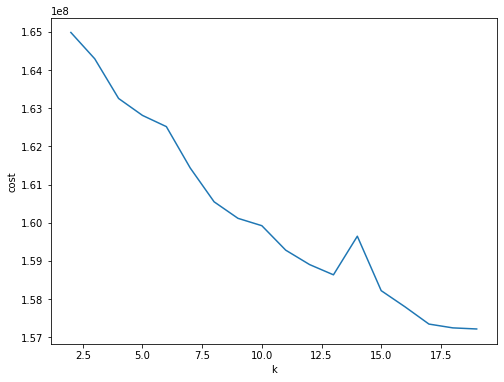

In [41]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [42]:
cost = np.zeros(20)
for k in range(2,20):
    bkm = BisectingKMeans(featuresCol='features').setK(2).setSeed(1)
    modelo = bkm.fit(title_feature)
    custo = modelo.summary.trainingCost
    print("Valor de k ", k, "custo ", str(custo))
    cost[k] = custo

Valor de k  2 custo  167285880.4666579
Valor de k  3 custo  167285880.4666579
Valor de k  4 custo  167285880.4666579
Valor de k  5 custo  167285880.4666579
Valor de k  6 custo  167285880.4666579
Valor de k  7 custo  167285880.4666579
Valor de k  8 custo  167285880.4666579
Valor de k  9 custo  167285880.4666579
Valor de k  10 custo  167285880.4666579
Valor de k  11 custo  167285880.4666579
Valor de k  12 custo  167285880.4666579
Valor de k  13 custo  167285880.4666579
Valor de k  14 custo  167285880.4666579
Valor de k  15 custo  167285880.4666579
Valor de k  16 custo  167285880.4666579
Valor de k  17 custo  167285880.4666579
Valor de k  18 custo  167285880.4666579
Valor de k  19 custo  167285880.4666579


Text(0, 0.5, 'cost')

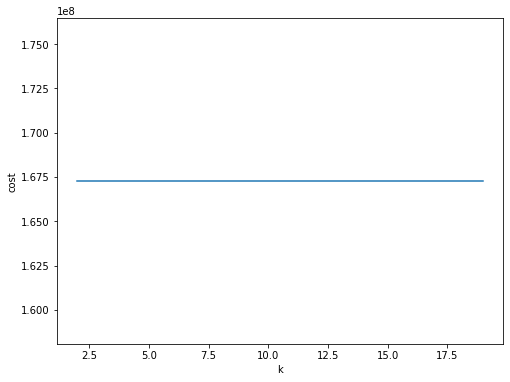

In [43]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

# Considerações sobre o Trabalho

A maior parte do trabalho foi gasto para à preparação dos dados nas etapas de pré-processamento, compreensão do algoritmo e avaliação do modelo.

Durante o processo de otimização, para se encontrar o foi-se percebido que quanto mais se aumentava o valor do k, maior era a taxa de erro.

Durante o processo de treinamento notou-se que os Bisecting k-means foi mais rapido com relação ao modelo KMeans, em ambos os casos os mesmo apresentaram resultados semelhantes.

K-Means não é o melhor algoritmo para análise de texto em geral, pois pode funcionar mal em dimensões altas. Como proposta futura será aplicado um modelo LDA ou Gaussian Mixture Model.

# Questões teóricas

###  Questão 8) Porque map reduce do hadoop não é adequado para aplicar nos algoritmos de aprendizagem de máquina ?

#### Resposta:
Map reduce é uma ferramenta para lidar com grandes volumes de dados em paralelo em grandes clusters de hardware comum de maneira confiável e tolerante a falhas. Este não possue uma biblioteca de aprendizado de máquina integrada, precisado de pacotes de terceiro.

### Questão 9) Qual a diferença fundamental entre transformação e ações no spark ?

#### Resposta:
 - Transformações criam um novo RDD ou DataFrame a partir de um existente, estes são executados sob demanda.
 - Ações retornam os resultados finais de cáculos.
 - Transformação é função que altera os dados, já as acções elas não alteram os dados mas fornece uma saída.

### Questão 10) Qual a vantagem de uma arquitetura com spark e hdfs ? 

#### Resposta:

- Spark é uma ferramenta que apresenta como intuito aprimorar e não substituir a pilha do Hadoop. Tolerância a falhas do Spark é alcançada principalmente por meio de operações RDD. Inicialmente, os dados em repouso são armazenados no HDFS, que é tolerante a falhas por meio da arquitetura do Hadoop. À medida que um RDD é construído, também o é uma linhagem, que lembra como o conjunto de dados foi construído e, como é imutável, pode reconstruí-lo do zero, se necessário.
- Spark foi projetado para ler e gravar dados de e para HDFS, bem como outros sistemas de armazenamento, como o HBase e o S3 da Amazon.

### Questão 11) Qual a vantagem em utilizar um cluster spark ?

#### Resposta:
Aplicações desenvolvidas utilizando um cluster spark executam operações mais rápido em memória e em disco. 

### Questão 12) Quais dos produtos do hadoop o spark mostra uma grande melhora ? 

#### Resposta:
Map reduce

### Questão 13) Qual o problema ao aplicar machine learning em bigdata que faz com que spark ganhe tanto destaque ?

#### Resposta: 
Spark possue estrtuturas que tem bom desempenho para lidar com grandes volumes de dados, este permite ter uma melhor performace durante as etapas de treinamento, visto que Spark é uma ferramenta que trabalha com uma arquitetura distribuida.

### Questão 14) Cite um exemplo de um problema que não envolva machine learning que você detecta que spark poderia auxiliar ?

#### Resposta:
Realização de consultas complexas em estruturas de Bancos de Dados Relacionais. Modulo Spark aplicados no contexto de consultas complexas onde temos diversos relacionamento podem ser utilizados para ser obter uma melhor performace durante as consultas.

### Questão 15) Comente sobre a finalidade cada uma das bibliotecas do Spark: SQL and DataFrames, Spark Streaming, MLlib (machine learning) e GraphX (graph) ?

#### Resposta:

- Spark SQL é um módulo Spark para processamento de dados estruturados. Está API fornece uma interface sobre a estrutura dos dados e do cálculo que está sendo executado. Internamente, o Spark SQL usa essas informações extras para realizar otimizações extras. Existem várias maneiras de interagir com o Spark SQL, incluindo SQL e a API Dataset. Um uso do Spark SQL é executar consultas SQL. O Spark SQL também pode ser usado para ler dados. Um DataFrame é um conjunto de dados organizado em colunas nomeadas. Conceitualmente equivale a uma tabela em um banco de dados relacional ou um quadro de dados em R / Python, mas com otimizações. Os DataFrames podem ser construídos a partir de uma ampla variedade de fontes , como: arquivos de dados estruturados.

- Spark Streaming é uma API que permite o processamento escalonável, de alto rendimento e tolerante a falhas de fluxos de dados ao vivo. Os dados podem ser ingeridos a partir de muitas fontes, como Kafka ou TCP, e pode ser processado por meio de algoritmos complexos expressos com funções de alto nível como map e reduce.

- MLlib é a biblioteca de aprendizado de máquina (ML) do Spark. Seu objetivo é tornar o aprendizado de máquina prático escalonável e fácil.
- GraphX é um novo componente do Spark para gráficos e computação paralela a gráficos. 

### Questão 16) O que são RDD ?

#### Resposta:

*Resilient Distributed Datasets* (RDD) é uma coleção imutável de objetos distribuídos. De acordo com a Documentação do Spark RDD é um conjunto de dados distribuído, que é uma coleção de elementos particionados nos nós do cluster que podem ser operados em paralelo.Os RDDs são criados começando com um arquivo no sistema de arquivos compatível com Hadoop ou uma coleção Scala existente no programa do driver e transformando-o.